In [2]:
# importing packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import emission

import yt
from yt.units import dimensions
# Load the dataset.
#ds = yt.load("/Users/bnowicki/Documents/Research/Ricotti/output_00273")

#print(dir(ds.fields.gas))

'''
cell_fields = [
    "Density",
    "x-velocity",
    "y-velocity",
    "z-velocity",
    "Pressure",
    "Metallicity",
    # "dark_matter_density",
    "xHI",
    "xHII",
    "xHeII",
    "xHeIII",
]
epf = [
    ("particle_family", "b"),
    ("particle_tag", "b"),
    ("particle_birth_epoch", "d"),
    ("particle_metallicity", "d"),
]
'''
def _ion_param(field, data): 
    photon=data['ramses-rt', 'Photon_density_1']+data['ramses-rt', 'Photon_density_2'] + data['ramses-rt', 'Photon_density_3'] + data['ramses-rt', 'Photon_density_4']

    return photon/data['gas', 'number_density']  

yt.add_field(
    ('gas', 'ion-param'), 
    function=_ion_param, 
    sampling_type="cell", 
    units="cm**3", 
    force_override=True
)

def _halpha_emission(field, data):
    interpolator=emission.get_interpolator(0)
    # change to log values
    U = np.log10(data['gas', 'ion-param'].value)
    N = np.log10(data['gas', 'number_density'].value)
    T = np.log10(data['gas', 'temperature'].value)

    Uadj = np.where(U < -6.0, -6.0, U)
    Uadj = np.where(Uadj > 1.0, 1.0, Uadj)

    Nadj = np.where(N < -1.0, -1.0, N)
    Nadj = np.where(Nadj > 6.0, 6.0, Nadj)

    Tadj = np.where(T < 3.0, 3.0, T)
    Tadj = np.where(Tadj > 6.0, 6.0, Tadj)
    
    tup = np.stack((Uadj, Nadj, Tadj), axis=-1)
    return interpolator(tup)*data['gas', 'number_density']

yt.add_field(
    ('gas', 'halpha_emission'),
    function=_halpha_emission,
    sampling_type='cell',
    #units='erg cm**-2 s**-1',
    units='1/cm**3',
    #dimension=dimensions,
    #units='auto',
    #dimensions=dimensions.pressure,
    force_override=True
)

def _OIII_emission(field, data):
    interpolator=emission.get_interpolator(9)
    # change to log values
    U = np.log10(data['gas', 'ion-param'].value)
    N = np.log10(data['gas', 'number_density'].value)
    T = np.log10(data['gas', 'temperature'].value)

    Uadj = np.where(U < -6.0, -6.0, U)
    Uadj = np.where(Uadj > 1.0, 1.0, Uadj)

    Nadj = np.where(N < -1.0, -1.0, N)
    Nadj = np.where(Nadj > 6.0, 6.0, Nadj)

    Tadj = np.where(T < 3.0, 3.0, T)
    Tadj = np.where(Tadj > 6.0, 6.0, Tadj)
    
    tup = np.stack((Uadj, Nadj, Tadj), axis=-1)
    return interpolator(tup)*data['gas', 'number_density']

yt.add_field(
    ('gas', 'OIII_emission'),
    function=_OIII_emission,
    sampling_type='cell',
    #units='erg cm**-2 s**-1',
    units='1/cm**3',
    #dimension=dimensions,
    force_override=True
)


f1 = "/Users/bnowicki/Documents/Research/Ricotti/output_00273"

#ds = yt.load(f1, fields=cell_fields, extra_particle_fields=epf)

#p = yt.ProjectionPlot(ds, "z", ("gas", "number_density"), width=0.0001,
#                      weight_field=("gas", "number_density"),
#                      buff_size=(1000, 1000),
#                      center=[0.49118094, 0.49275361, 0.49473726])

#p.show()
#ds.fields

ds = yt.load("/Users/bnowicki/Documents/Research/Ricotti/output_00273")

'''
p = yt.ProjectionPlot(ds, "z", ("gas", "ion-param"), width=0.0001,
                      weight_field=("gas", "number_density"),
                      buff_size=(1000, 1000),
                      center=[0.49118094, 0.49275361, 0.49473726])

p.show()
'''
#ds.fields
#-6.0 1.0 0.5 -1.0 6.0 0.5 3.0 6.0 0.1

ds.fields


-6.0 1.0 0.5 -1.0 6.0 0.5 3.0 6.0 0.1
(25, 6975)
15 15 31


yt : [INFO     ] 2024-10-10 13:11:03,597 Parameters: current_time              = 4.311420483661945
yt : [INFO     ] 2024-10-10 13:11:03,597 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2024-10-10 13:11:03,598 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-10-10 13:11:03,598 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-10-10 13:11:03,598 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-10-10 13:11:03,599 Parameters: current_redshift          = 12.171087046255657
yt : [INFO     ] 2024-10-10 13:11:03,599 Parameters: omega_lambda              = 0.685000002384186
yt : [INFO     ] 2024-10-10 13:11:03,599 Parameters: omega_matter              = 0.314999997615814
yt : [INFO     ] 2024-10-10 13:11:03,599 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-10-10 13:11:03,600 Parameters: hubble_constant           = 0.674000015258789
yt : [INFO     ] 2024-10-10 13:11:03,623 Detected RAMSES-RT 

yt : [INFO     ] 2024-10-10 13:11:38,953 Projection completed
yt : [INFO     ] 2024-10-10 13:11:38,974 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-10-10 13:11:38,974 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-10-10 13:11:38,979 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-10-10 13:11:38,979 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-10-10 13:11:38,983 Making a fixed resolution buffer of (('gas', 'ion-param')) 1000 by 1000



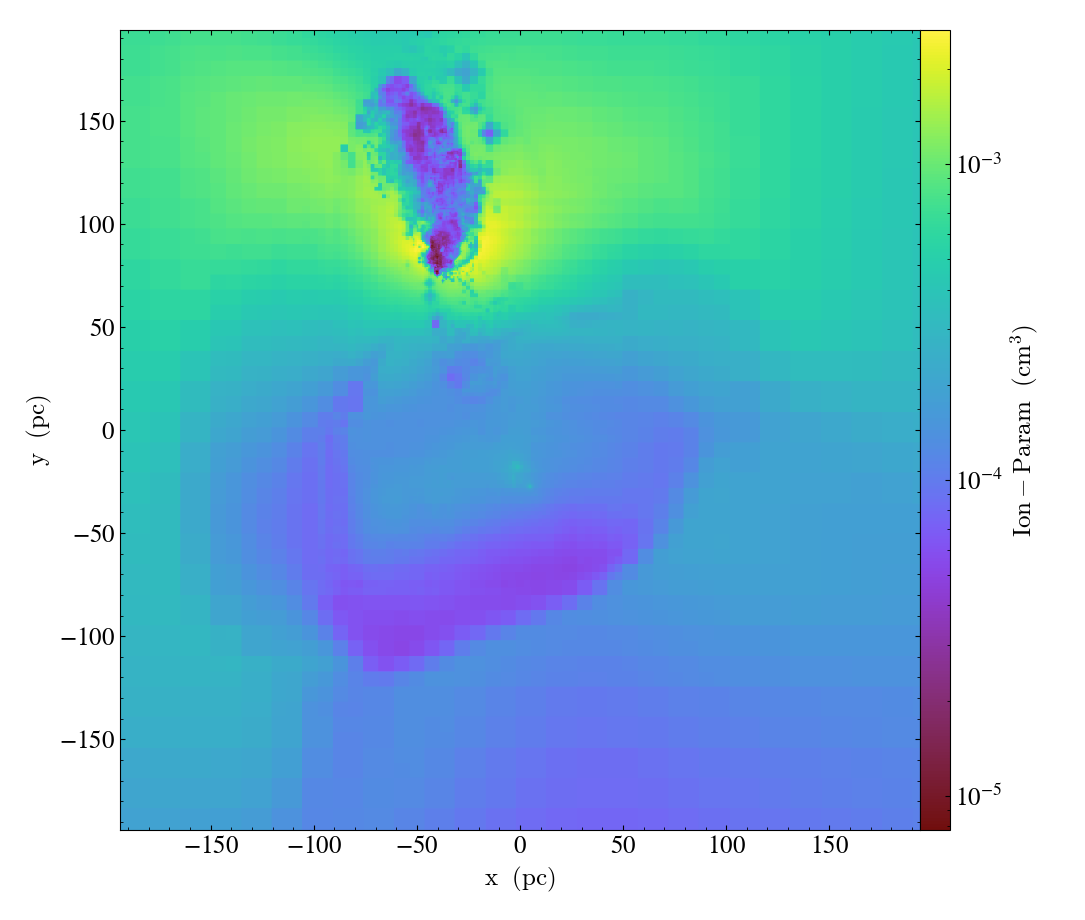

In [3]:
p = yt.ProjectionPlot(ds, "z", ("gas", "ion-param"), width=0.0001,
                      weight_field=("gas", "number_density"),
                      buff_size=(1000, 1000),
                      center=[0.49118094, 0.49275361, 0.49473726])

p.show()

yt : [INFO     ] 2024-10-10 13:11:58,119 Projection completed
yt : [INFO     ] 2024-10-10 13:11:58,121 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-10-10 13:11:58,122 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-10-10 13:11:58,124 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-10-10 13:11:58,125 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-10-10 13:11:58,126 Making a fixed resolution buffer of (('gas', 'temperature')) 1000 by 1000



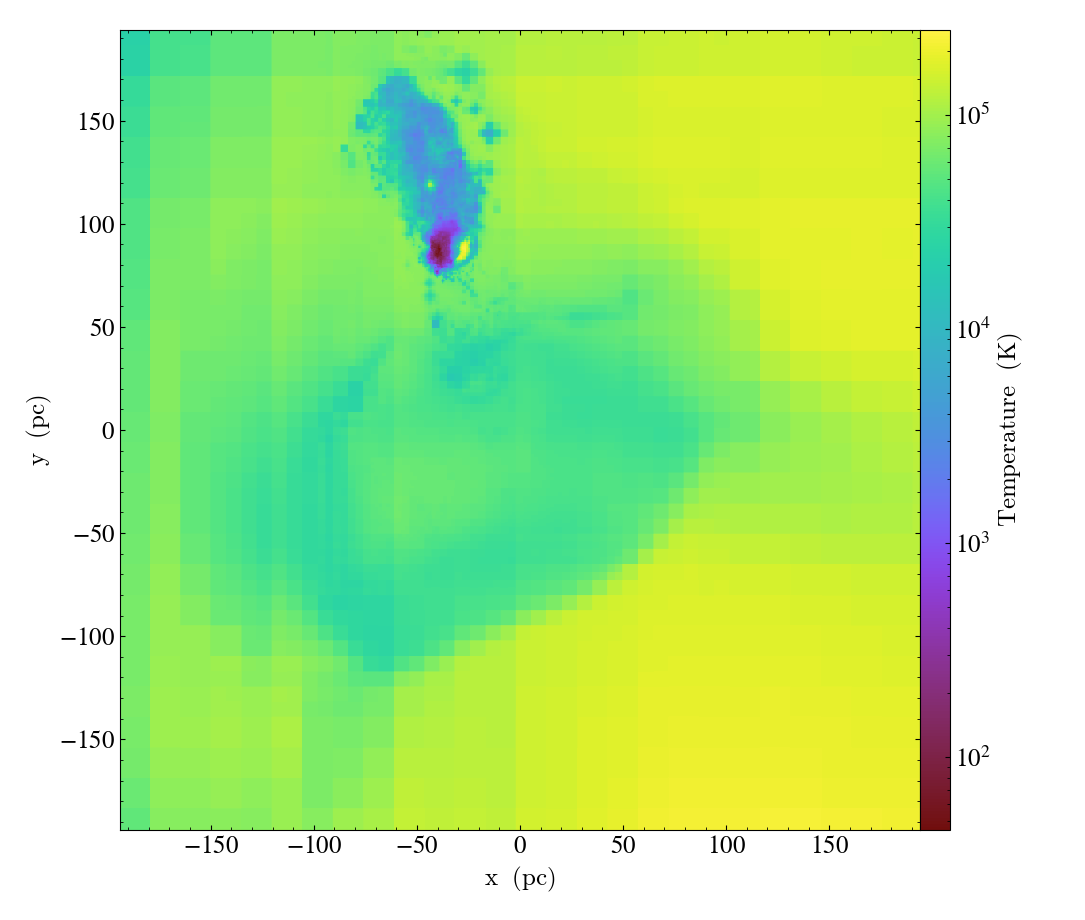

In [4]:
p = yt.ProjectionPlot(ds, "z", ("gas", "temperature"), width=0.0001,
                      weight_field=("gas", "number_density"),
                      buff_size=(1000, 1000),
                      center=[0.49118094, 0.49275361, 0.49473726])

p.show()

yt : [INFO     ] 2024-10-10 13:12:08,792 Projection completed
yt : [INFO     ] 2024-10-10 13:12:08,796 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-10-10 13:12:08,797 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-10-10 13:12:08,800 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-10-10 13:12:08,801 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-10-10 13:12:08,802 Making a fixed resolution buffer of (('gas', 'density')) 1000 by 1000



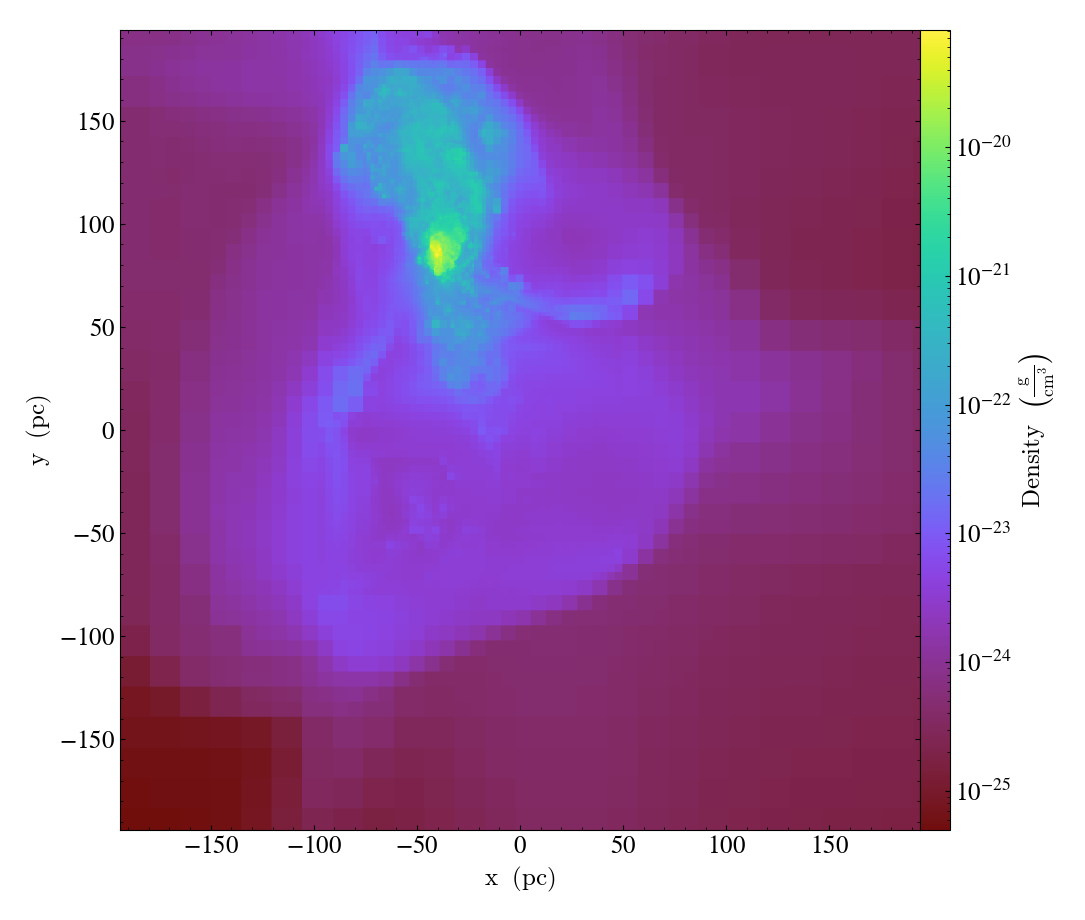

In [5]:
p = yt.ProjectionPlot(ds, "z", ("gas", "density"), width=0.0001,
                      weight_field=("gas", "number_density"),
                      buff_size=(1000, 1000),
                      center=[0.49118094, 0.49275361, 0.49473726])

p.show()

/var/folders/rh/cscbbcyd02lfdp3qqy7mdmjm0000gn/T/ipykernel_45270/620357978.py:54: RuntimeWarning: divide by zero encountered in log10
  T = np.log10(data['gas', 'temperature'].value)
yt : [INFO     ] 2024-10-10 13:12:26,301 Projection completed
yt : [INFO     ] 2024-10-10 13:12:26,304 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-10-10 13:12:26,305 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-10-10 13:12:26,307 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-10-10 13:12:26,307 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-10-10 13:12:26,308 Making a fixed resolution buffer of (('gas', 'halpha_emission')) 1000 by 1000



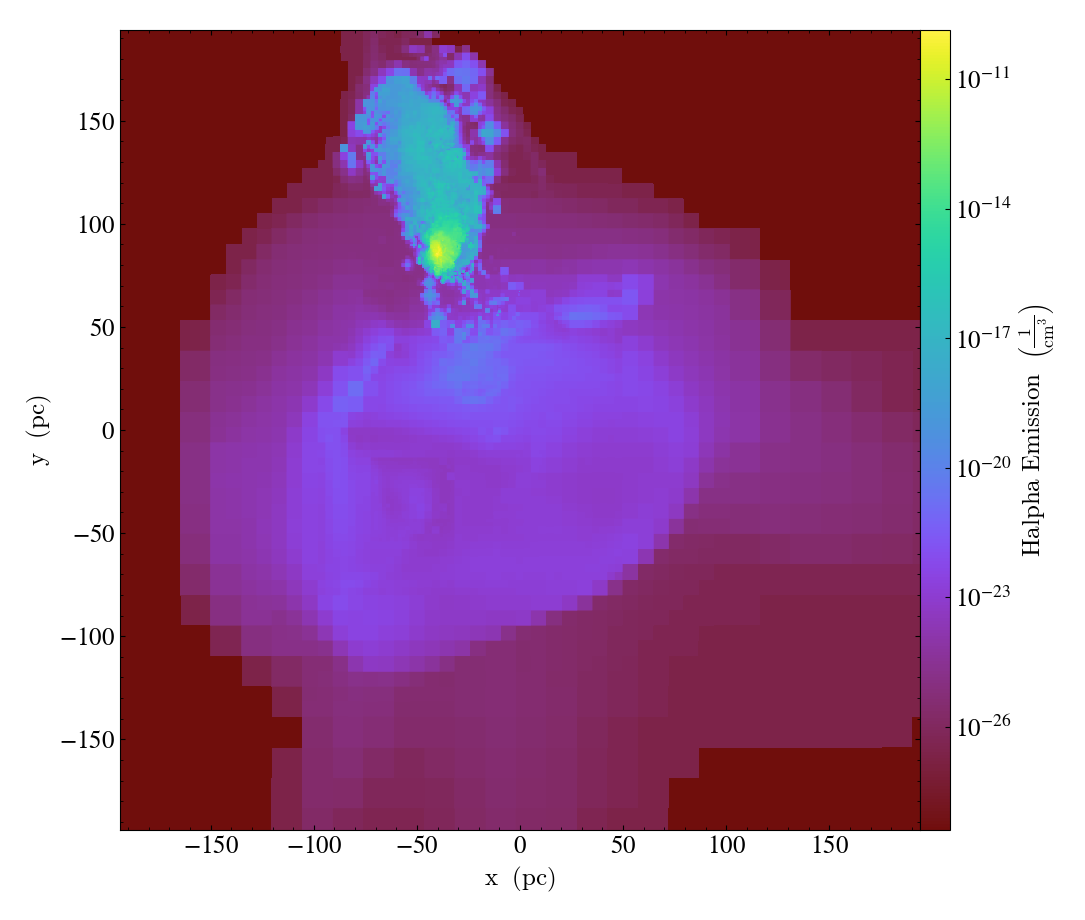

In [6]:
p = yt.ProjectionPlot(ds, "z", ("gas", "halpha_emission"), width=0.0001,
                      weight_field=("gas", "number_density"),
                      buff_size=(1000, 1000),
                      center=[0.49118094, 0.49275361, 0.49473726])

p.show()

/var/folders/rh/cscbbcyd02lfdp3qqy7mdmjm0000gn/T/ipykernel_45270/620357978.py:85: RuntimeWarning: divide by zero encountered in log10
  T = np.log10(data['gas', 'temperature'].value)
yt : [INFO     ] 2024-10-10 13:13:29,205 Projection completed
yt : [INFO     ] 2024-10-10 13:13:29,207 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-10-10 13:13:29,207 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-10-10 13:13:29,209 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-10-10 13:13:29,209 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-10-10 13:13:29,210 Making a fixed resolution buffer of (('gas', 'OIII_emission')) 1000 by 1000



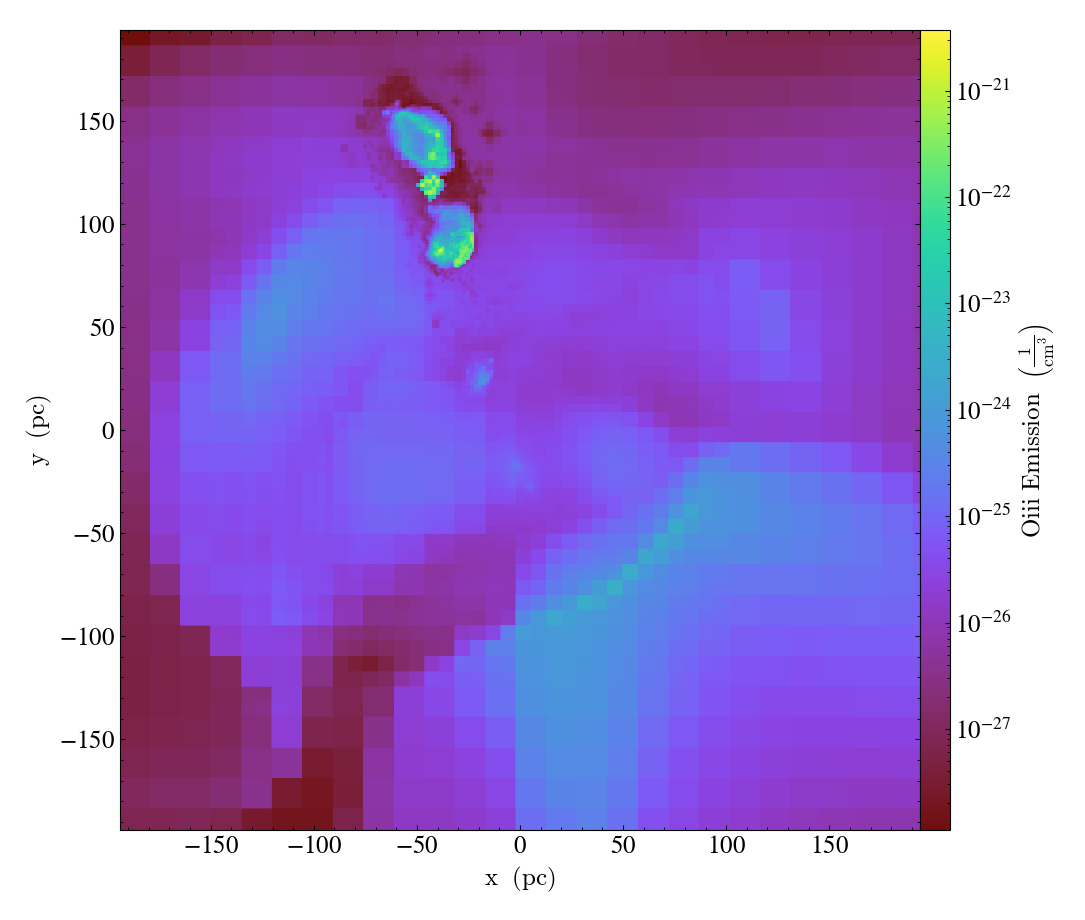

In [7]:
p = yt.ProjectionPlot(ds, "z", ("gas", "OIII_emission"), width=0.0001,
                      weight_field=("gas", "number_density"),
                      buff_size=(1000, 1000),
                      center=[0.49118094, 0.49275361, 0.49473726])

p.show()

# multiply by metallicity

In [8]:
def _halpha_emission_2(field, data):
    interpolator=emission.get_interpolator(0)
    # change to log values
    U = np.log10(data['gas', 'ion-param'].value)
    N = np.log10(data['gas', 'number_density'].value)
    T = np.log10(data['gas', 'temperature'].value)

    Uadj = np.where(U < -6.0, -6.0, U)
    Uadj = np.where(Uadj > 1.0, 1.0, Uadj)

    Nadj = np.where(N < -1.0, -1.0, N)
    Nadj = np.where(Nadj > 6.0, 6.0, Nadj)

    Tadj = np.where(T < 3.0, 3.0, T)
    Tadj = np.where(Tadj > 6.0, 6.0, Tadj)
    
    tup = np.stack((Uadj, Nadj, Tadj), axis=-1)
    return interpolator(tup)*data['gas', 'number_density']/data['gas', 'number_density']

ds.add_field(
    ('gas', 'halpha_emission_2'),
    function=_halpha_emission_2,
    sampling_type='cell',
    #units='erg cm**-2 s**-1',
    #units='dimensionless',
    #dimension=dimensions,
    #units='auto',
    #dimensions=dimensions.dimensionless,
    #output_units='erg/cm**3/s',
    #units=ds.unit_system["dimensionless"],
    units='1',
    force_override=True
)

/var/folders/rh/cscbbcyd02lfdp3qqy7mdmjm0000gn/T/ipykernel_45270/3995977563.py:6: RuntimeWarning: divide by zero encountered in log10
  T = np.log10(data['gas', 'temperature'].value)
yt : [INFO     ] 2024-10-10 13:13:55,519 Projection completed
yt : [INFO     ] 2024-10-10 13:13:55,522 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-10-10 13:13:55,522 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-10-10 13:13:55,524 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-10-10 13:13:55,525 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-10-10 13:13:55,526 Making a fixed resolution buffer of (('gas', 'halpha_emission_2')) 1000 by 1000



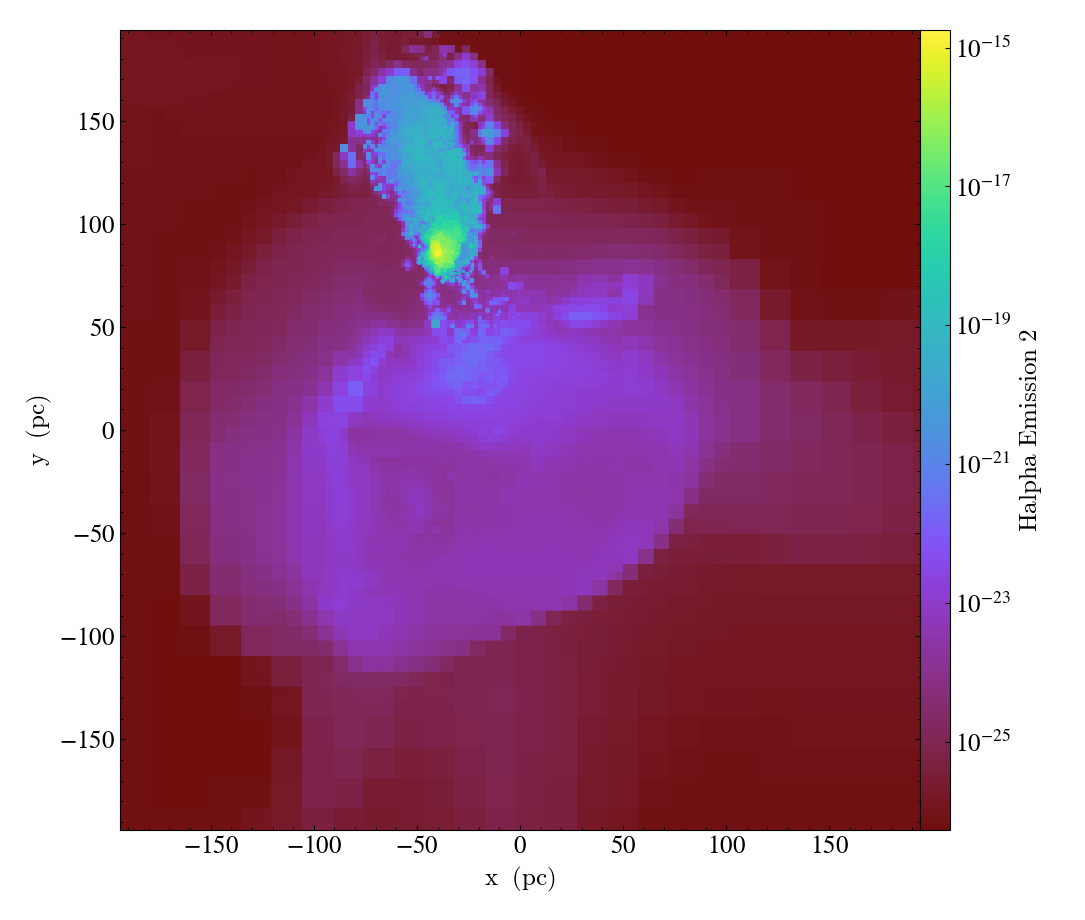

In [9]:
p = yt.ProjectionPlot(ds, "z", ("gas", "halpha_emission_2"), width=0.0001,
                      weight_field=("gas", "number_density"),
                      buff_size=(1000, 1000),
                      center=[0.49118094, 0.49275361, 0.49473726])

p.show()

/var/folders/rh/cscbbcyd02lfdp3qqy7mdmjm0000gn/T/ipykernel_45270/2295670235.py:6: RuntimeWarning: divide by zero encountered in log10
  T = np.log10(data['gas', 'temperature'].value)
yt : [INFO     ] 2024-10-10 13:15:16,702 Projection completed
yt : [INFO     ] 2024-10-10 13:15:16,705 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-10-10 13:15:16,705 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-10-10 13:15:16,707 xlim = 0.491131 0.491231
yt : [INFO     ] 2024-10-10 13:15:16,708 ylim = 0.492704 0.492804
yt : [INFO     ] 2024-10-10 13:15:16,709 Making a fixed resolution buffer of (('gas', 'OII_emission')) 1000 by 1000



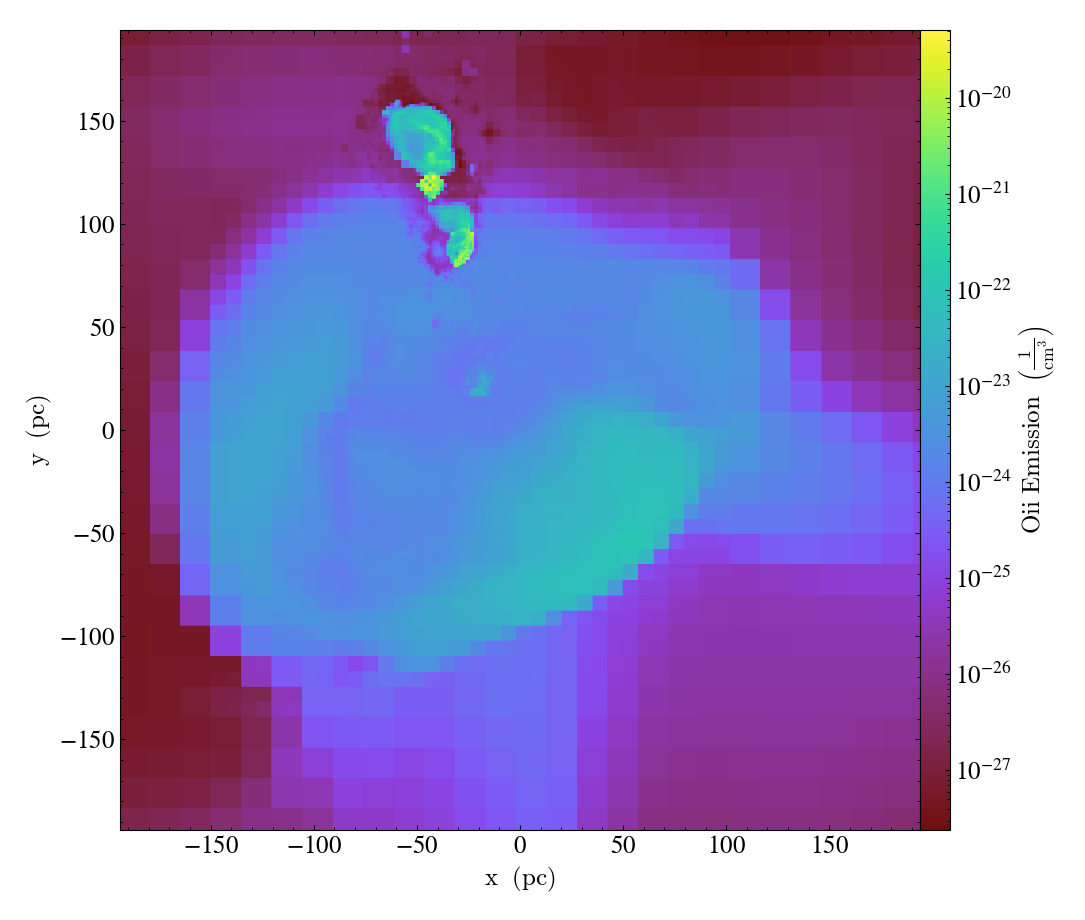

In [10]:
def _OII_emission(field, data):
    interpolator=emission.get_interpolator(3)
    # change to log values
    U = np.log10(data['gas', 'ion-param'].value)
    N = np.log10(data['gas', 'number_density'].value)
    T = np.log10(data['gas', 'temperature'].value)

    Uadj = np.where(U < -6.0, -6.0, U)
    Uadj = np.where(Uadj > 1.0, 1.0, Uadj)

    Nadj = np.where(N < -1.0, -1.0, N)
    Nadj = np.where(Nadj > 6.0, 6.0, Nadj)

    Tadj = np.where(T < 3.0, 3.0, T)
    Tadj = np.where(Tadj > 6.0, 6.0, Tadj)
    
    tup = np.stack((Uadj, Nadj, Tadj), axis=-1)
    return interpolator(tup)*data['gas', 'number_density']

ds.add_field(
    ('gas', 'OII_emission'),
    function=_OII_emission,
    sampling_type='cell',
    #units='erg cm**-2 s**-1',
    units='1/cm**3',
    #dimension=dimensions,
    force_override=True
)

def _OII_emission_2(field, data):
    interpolator=emission.get_interpolator(4)
    # change to log values
    U = np.log10(data['gas', 'ion-param'].value)
    N = np.log10(data['gas', 'number_density'].value)
    T = np.log10(data['gas', 'temperature'].value)

    Uadj = np.where(U < -6.0, -6.0, U)
    Uadj = np.where(Uadj > 1.0, 1.0, Uadj)

    Nadj = np.where(N < -1.0, -1.0, N)
    Nadj = np.where(Nadj > 6.0, 6.0, Nadj)

    Tadj = np.where(T < 3.0, 3.0, T)
    Tadj = np.where(Tadj > 6.0, 6.0, Tadj)
    
    tup = np.stack((Uadj, Nadj, Tadj), axis=-1)
    return interpolator(tup)*data['gas', 'number_density']

ds.add_field(
    ('gas', 'OII_emission_2'),
    function=_OII_emission_2,
    sampling_type='cell',
    #units='erg cm**-2 s**-1',
    units='1/cm**3',
    #dimension=dimensions,
    force_override=True
)

def _O_ratio(field, data):
    return data['OII_emission']/data['OII_emission_2']

ds.add_field(
    ('gas', 'O_ratio'),
    function=_O_ratio,
    sampling_type='cell',
    #units='erg cm**-2 s**-1',
    units='1',
    #dimension=dimensions,
    force_override=True
)

p = yt.ProjectionPlot(ds, "z", ("gas", "OII_emission"), width=0.0001,
                      weight_field=("gas", "number_density"),
                      buff_size=(1000, 1000),
                      center=[0.49118094, 0.49275361, 0.49473726])

p.show()

In [ ]:
# electron fraction, ionization fraction H_p1_fraction

# value of projection plots -> OII ratio

# Double check units, integration
# Play with line emissions
# Compare physically with previous plots 
# Multiply by metallicity?